# Distribuição de Frequência

A **distribuição de frequência** é uma forma de **organizar os dados** para mostrar **quantas vezes** cada valor (ou grupo de valores) aparece em um conjunto de dados.

Ela ajuda a **visualizar padrões**, como os valores mais comuns ou a forma como os dados estão distribuídos.

---

### Componentes principais:

#### - **Frequência Absoluta:**

## $$f_i$$ 

Número de vezes que um valor (ou classe) aparece nos dados. É a contagem simples das ocorrências.

---

#### - **Frequência Relativa:**

## $$f_{r_i} = \frac{f_i}{n}$$ 

Proporção de vezes que o valor aparece em relação ao total de dados ($n$).  
Varia entre $0$ e $1$. Pode ser transformada em percentual multiplicando por 100.

---

#### - **Frequência Relativa Percentual:**

## $$f_{r_i\%} = \frac{f_i}{n} \cdot 100$$

É a **frequência relativa expressa em porcentagem**. Ajuda a visualizar melhor a proporção de cada valor no conjunto total.

---

#### - **Frequência Acumulada Absoluta:**

## $$F_i = \sum_{j=1}^{i} f_j$$

Soma das frequências absolutas até um determinado valor.  
Indica **quantos elementos** estão abaixo ou até certo ponto da distribuição.

---

#### - **Frequência Acumulada Relativa:**

## $$F_{r_i} = \sum_{j=1}^{i} f_{rj} = \frac{F_i}{n}$$

Soma das frequências relativas até um valor específico.  
Mostra a **proporção acumulada** dos dados.  
Também pode ser expressa em porcentagem.

---

### Exemplo simples:

| Idade (anos) | $f_i$ | $f_{r_i}$ | $f_{r_i\%}$ | $F_i$ | $F_{r_i}$ |
|--------------|-------|-----------|------------|-------|-----------|
| 18           | 2     | 0.10      | 10\%       | 2     | 0.10      |
| 19           | 3     | 0.15      | 15\%       | 5     | 0.25      |
| 20           | 5     | 0.25      | 25\%       | 10    | 0.50      |
| 21           | 6     | 0.30      | 30\%       | 16    | 0.80      |
| 22           | 4     | 0.20      | 20\%       | 20    | 1.00      |

---

Nesse exemplo, podemos observar:

- O valor mais comum é **21 anos**, pois tem a maior frequência absoluta.
- A **frequência acumulada absoluta ($F_i$)** mostra que até os 20 anos, temos **10 pessoas**.
- A **frequência acumulada relativa ($F_{r_i}$)** indica que **50% dos dados** estão até a idade de 20 anos.

---

A distribuição de frequência pode ser aplicada tanto para **valores únicos** (dados discretos), quanto para **intervalos de classe** (dados contínuos), facilitando a análise e visualização dos dados.


## Distribuição de frequências para variáveis qualitativas

### Importando bibliotecas

- https://pandas.pydata.org/

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv(r"../../dados/datasets/amostra-de-domicilios.csv")
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


- $0$: representam Homens   
- $1$: representam Mulheres

In [4]:
dados["Sexo"].value_counts()

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [5]:
dados["Sexo"].value_counts(normalize=True) * 100

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [6]:
frequencia = dados["Sexo"].value_counts()
percentual = dados["Sexo"].value_counts(normalize=True) * 100

In [7]:
distribuicao_freq_qualitativa = pd.DataFrame({"Frequência absoluta": frequencia, "Frequência Relativa (%)": percentual})
distribuicao_freq_qualitativa

,Frequência absoluta,Frequência Relativa (%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


- Alterando o nome da coluna `sexo`

In [8]:
distribuicao_freq_qualitativa.rename(index={0: "Masculino", 1: "Feminino"}, inplace=True)
distribuicao_freq_qualitativa

,Frequência absoluta,Frequência Relativa (%)
Sexo,,
Masculino,53250,69.299844
Feminino,23590,30.700156


In [9]:
sexo = {0: "Masculino",
        1: "Feminino"}

cor = {0: "Indígena",
       2: "Branca",
       4: "Preta",
       6: "Amarela",
       8: "Parda",
       9: "Sem declaração"}

In [10]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


- ### Frequencia Absoluta ($f$)
- alterando o nome das cores

In [11]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


- ### Frequencia Relativa ($f_r$)

In [12]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize=True) * 100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [13]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc="mean",
                         values=dados.Renda)
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


#### Especificando os limites de cada classe

Utilizando a seguinte classificação com base no salário mensal:

##### Classe A
- **Definição:** Acima de 20 salários mensais
- **Equivalente em reais:** Acima de **R$ 15.760,00**

##### Classe B
- **Definição:** De 10 a 20 salários mensais
- **Equivalente em reais:** De **R$ 7.880,00** a **R$ 15.760,00**

##### Classe C
- **Definição:** De 4 a 10 salários mensais
- **Equivalente em reais:** De **R$ 3.152,00** a **R$ 7.880,00**

##### Classe D
- **Definição:** De 2 a 4 salários mensais
- **Equivalente em reais:** De **R$ 1.576,00** a **R$ 3.152,00**

##### Classe E
- **Definição:** Até 2 salários mensais
- **Equivalente em reais:** Até **R$ 1.576,00**

> Considerando que o valor do salário mínimo em 2015 era de **R$ 788,00**.



In [14]:
dados.Renda.min()

np.int64(0)

In [15]:
dados.Renda.max()

np.int64(200000)

- ### Criando agrupamento por classes e renda

In [16]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [17]:
labels = ["E", "D", "C", "B", "A"]

In [18]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [19]:
pd.cut(x=dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

- ### Frequência Absoluta ($f_i$)

In [20]:
frequencia = pd.Series.value_counts(pd.cut(x=dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True))

frequencia.sort_index(ascending=False)

Renda
A      608
B     2178
C     7599
D    16700
E    49755
Name: count, dtype: int64

- ### Frequência Relativa ($f_{r_i}$)

In [21]:
percentual = pd.Series.value_counts(pd.cut(x=dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True),
       normalize=True) * 100

percentual.sort_index(ascending=False)

Renda
A     0.791255
B     2.834461
C     9.889381
D    21.733472
E    64.751432
Name: proportion, dtype: float64

- ### Frequência Acumulada Absoluta ($F_i$)

In [22]:
acumulada_absoluta = pd.Series.value_counts(pd.cut(x=dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True)) 

acumulada_absoluta = acumulada_absoluta.sort_index(ascending=False).cumsum()
acumulada_absoluta

Renda
A      608
B     2786
C    10385
D    27085
E    76840
Name: count, dtype: int64

- ### Frequência Relativa Percentual $f_{r_i\%}$ 

In [23]:
acumulada_relativa_percentual = pd.Series.value_counts(pd.cut(x=dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True),
       normalize=True) * 100

acumulada_relativa_percentual = acumulada_relativa_percentual.sort_index(ascending=False).cumsum()
acumulada_relativa_percentual

Renda
A      0.791255
B      3.625716
C     13.515096
D     35.248568
E    100.000000
Name: proportion, dtype: float64

- ### Frequência Relativa Percentual $F_{r_i}$

In [24]:
acumulada_relativa = pd.Series.value_counts(pd.cut(x=dados.Renda,
       bins=classes,
       labels=labels,
       include_lowest=True),
       normalize=True)

acumulada_relativa = acumulada_relativa.sort_index(ascending=False).cumsum()
acumulada_relativa

Renda
A    0.007913
B    0.036257
C    0.135151
D    0.352486
E    1.000000
Name: proportion, dtype: float64

- ### Todas as frequências no DataFrame

In [25]:
distribuicao_freq_quantitativa = pd.DataFrame(
    {"Frequência absoluta": frequencia, 
     "Frequência Relativa (%)": percentual,
     "Frequência Acumulada": acumulada_absoluta,
     "Frequencia A. Relativa (%)": acumulada_relativa_percentual,
     "Frequencia A. Relativa": acumulada_relativa})

distribuicao_freq_quantitativa.sort_index(ascending=False)

,Frequência absoluta,Frequência Relativa (%),Frequência Acumulada,Frequencia A. Relativa (%),Frequencia A. Relativa
Renda,,,,,
A,608,0.791255,608,0.791255,0.007913
B,2178,2.834461,2786,3.625716,0.036257
C,7599,9.889381,10385,13.515096,0.135151
D,16700,21.733472,27085,35.248568,0.352486
E,49755,64.751432,76840,100.000000,1.000000


---

## Distribuição de frequências para variáveis quantitativas (Amplitude Fixa)

#### Regra de Sturges

A **Regra de Sturges** é uma fórmula usada para determinar o número de classes (intervalos) ideais em uma distribuição de dados. Esta fórmula é útil quando você tem um conjunto de dados e deseja dividi-lo em um número adequado de classes para construir uma tabela de frequência.

A fórmula é dada por:

## $$k = 1 + \frac{10}{3} \log_{10}n$$

Onde:

- **$k$**: É o número recomendado de classes (ou intervalos) para a distribuição de frequência.
- **$n$**: É o número total de observações no conjunto de dados.
- **$\log_{10}$**: É o logaritmo de base 10.

#### Como funciona a fórmula?

1. **$n$** representa o total de observações (dados) que você tem em seu conjunto de dados.
2. **$\log_{10}$** é o logaritmo de base 10 do valor de **$n$**. O logaritmo ajuda a ajustar o número de classes de acordo com a quantidade de dados. Quanto maior o número de dados, maior o valor de **$k$**.
3. A fórmula soma 1 ao valor calculado para ajustar o número mínimo de classes.

#### Exemplo de cálculo:

Se tivermos 100 dados (ou seja, **$n = 100$**):

1. Calcule o logaritmo de 100 na base 10: 
   
   ### $$\log_{10} 100 = 2$$
   
2. Aplique a fórmula:

   ### $$k = 1 + \frac{10}{3} \times 2$$
   
   ### $$k = 1 + \frac{20}{3}$$
   
   ### $$k = 1 + 6.67$$
   
   ### $$k \approx 7.67$$

Portanto, o número ideal de classes seria aproximadamente **8** (arredondando para o número inteiro mais próximo).

#### O que essa fórmula nos diz?

A fórmula da **Regra de Sturges** ajuda a evitar que você use muito ou poucas classes ao dividir os dados. Usando esse número recomendado de classes, é possível gerar uma distribuição de frequência mais equilibrada e clara para análise.


### Importando bibliotecas

- https://numpy.org/

In [26]:
import numpy as np

In [27]:
n = dados.shape[0]
n

76840

In [28]:
# Regra de Sturges
k = 1 + (10/3) * np.log10(n)
k

np.float64(17.285291187298853)

In [29]:
k = int(k.round(0))
k

17

- ### Criando tabela de frequências
- ### Frequência Absoluta ($f_i$)

In [30]:
frequencia = pd.Series.value_counts(
    pd.cut(x=dados.Renda,
           bins= 17,
           include_lowest=True),
           sort=False
)

frequencia

Renda
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

- ### Frequência Relativa ($f_{r_i}$)

In [31]:
percentual = pd.Series.value_counts(
    pd.cut(x=dados.Renda,
           bins= 17,
           include_lowest=True),
           sort=False,
           normalize=True
) 

percentual

Renda
(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: proportion, dtype: float64

In [32]:
dist_freq_quantitativa_amp_fixa = pd.DataFrame(
    {"Frequência absoluta": frequencia, 
     "Frequência Relativa (%)": percentual,})

dist_freq_quantitativa_amp_fixa

,Frequência absoluta,Frequência Relativa (%)
Renda,,
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078


---
## Histogramas

- Histograma é um tipo de gráfico que mostra como os dados estão distribuídos. Ele é formado por barras retangulares colocadas uma do lado da outra. Cada barra representa um grupo de valores (chamado de "classe"), e o tamanho da barra mostra quantos dados estão naquele grupo. Quanto mais alta a barra, maior a quantidade de dados naquele intervalo.

### Importando bibliotecas

- https://seaborn.pydata.org/

In [33]:
import seaborn as sns

In [34]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


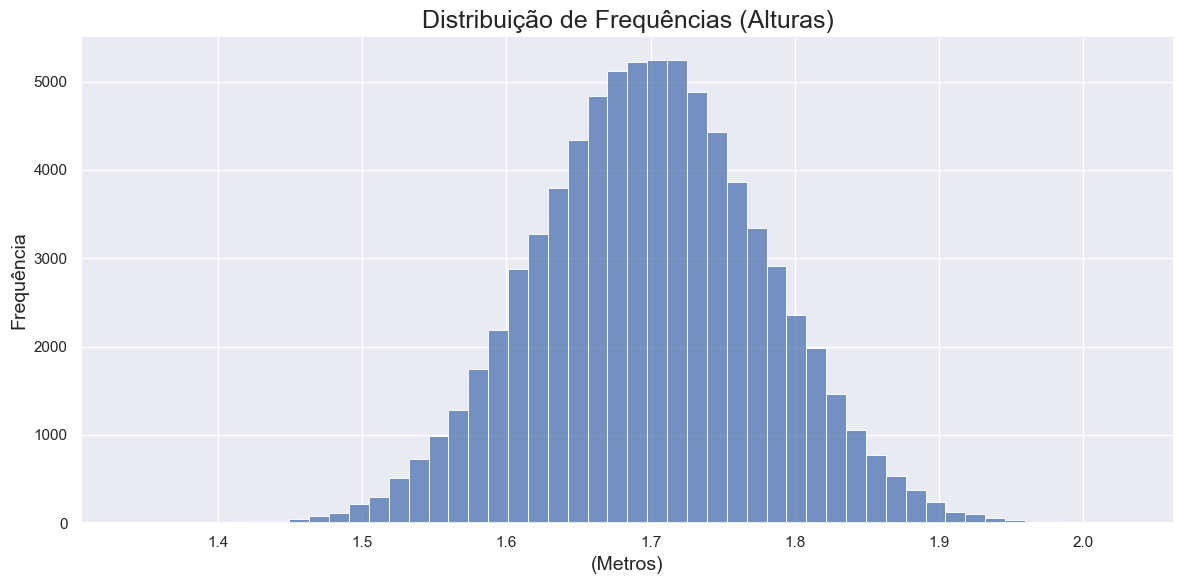

In [35]:
# Aplica o tema padrão
sns.set_theme()

ax = sns.histplot(data=dados, x="Altura", kde=False, bins=50)

ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de Frequências (Alturas)", fontsize=18)
ax.set_xlabel("(Metros)", fontsize=14)
ax.set_ylabel("Frequência", fontsize=14)
ax.figure.tight_layout()

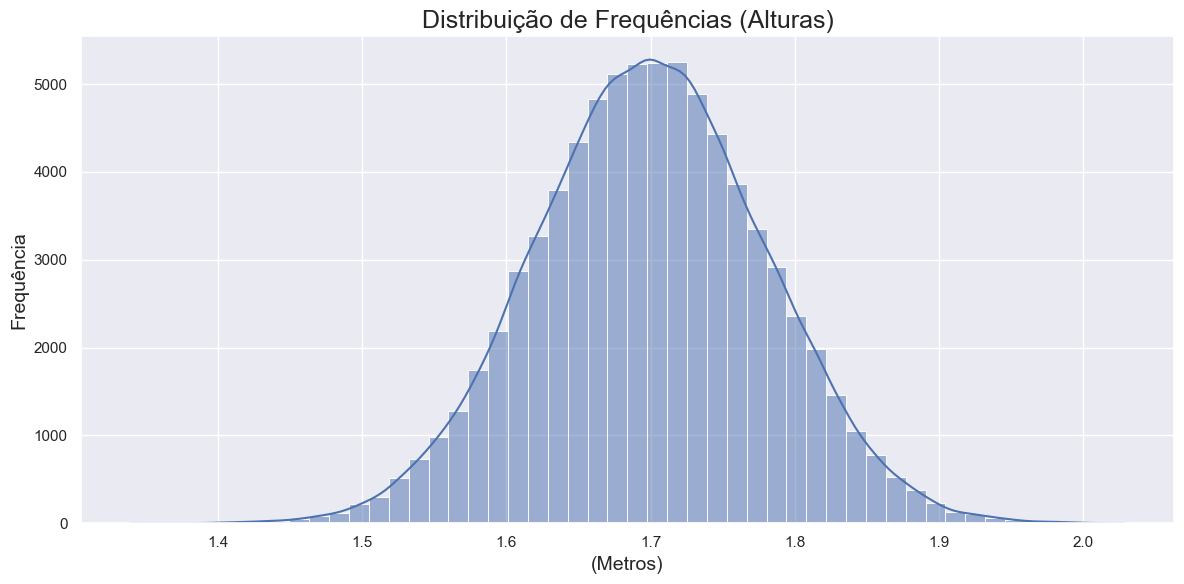

In [36]:
# Aplica o tema padrão
sns.set_theme()

ax = sns.histplot(data=dados, x="Altura", kde=True, bins=50)

ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de Frequências (Alturas)", fontsize=18)
ax.set_xlabel("(Metros)", fontsize=14)
ax.set_ylabel("Frequência", fontsize=14)
ax.figure.tight_layout()

In [37]:
distribuicao_freq_quantitativa

,Frequência absoluta,Frequência Relativa (%),Frequência Acumulada,Frequencia A. Relativa (%),Frequencia A. Relativa
Renda,,,,,
E,49755,64.751432,76840,100.000000,1.000000
D,16700,21.733472,27085,35.248568,0.352486
C,7599,9.889381,10385,13.515096,0.135151
B,2178,2.834461,2786,3.625716,0.036257
A,608,0.791255,608,0.791255,0.007913


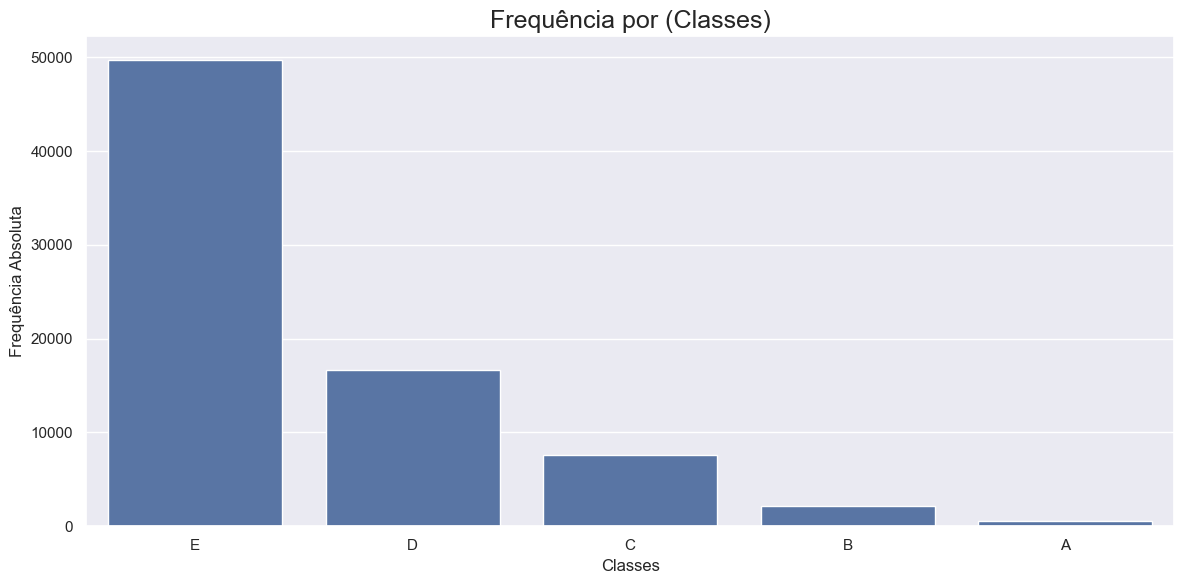

In [38]:
sns.set_theme()

ax = sns.barplot(x=distribuicao_freq_quantitativa.index, 
                 y=distribuicao_freq_quantitativa["Frequência absoluta"]
    )

ax.figure.set_size_inches(12, 6)
ax.set_title("Frequência por (Classes)", fontsize=18)
ax.set_xlabel("Classes")
ax.set_ylabel("Frequência Absoluta")
ax.figure.tight_layout();

### Salvando os dados
- Para continuar a trabalhar com em em `03-medidas-tendencia-central`

In [39]:
dados.to_csv("dados.csv", index=False)